# Problem Setting
Notice that $\theta = (\mu_0, \mu_1, \sigma_0, \sigma_1, p)$ are the parameters. We pre-estimate or fix $\sigma_0, \sigma_1, p$, and only estimate $\mu_0, \mu_1$.

In [1]:
import fun.EM.em as em
import importlib
importlib.reload(em)

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
n = max(1000, 200)

## Fixed Parameters
sigma_0 = sigma_1 = 10
p = 1/2

## True Model
mu_0 = 150
mu_1 = 160

np.random.seed(0)
y0 = np.random.normal(mu_0, sigma_0, size = n)
y1 = np.random.normal(mu_1, sigma_1, size = n)
y = np.concatenate([y0, y1])

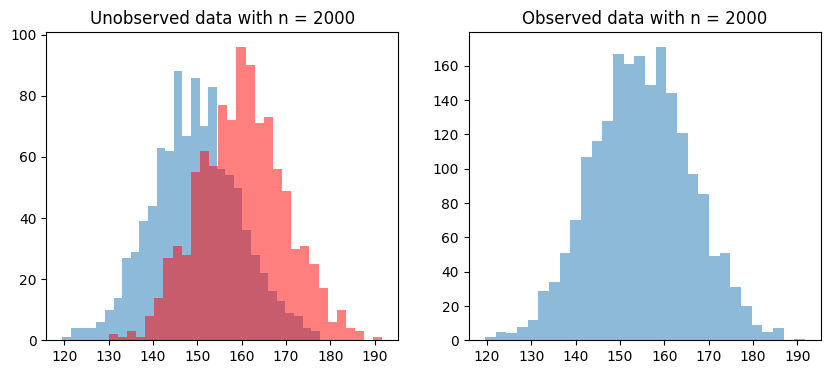

In [3]:
plt.figure(figsize = (10, 4))
ax = plt.subplot(121)
plt.hist(y0, bins = 30, alpha = 0.5, label = "Mean = 150")
plt.hist(y1, bins = 30, alpha = 0.5,color = 'red', label = "Mean = 160")
plt.title(f"Unobserved data with n = {2*n}")

ax = plt.subplot(122)
plt.hist(y, bins = 30, alpha = 0.5, label = "Mean = 150")
plt.title(f"Observed data with n = {2*n}");

# Training the Model

In [4]:
n = 50

## Fixed Parameters
sigma0 = sigma1 = 10
p = 1/2

## True Model
mu0 = 150
mu1 = 160

np.random.seed(0)
y0 = np.random.normal(mu0, sigma0, size = n)
y1 = np.random.normal(mu1, sigma1, size = n)
y = np.concatenate([y0, y1])

np.random.seed(0)
random_order = np.random.permutation(2*n)
z = np.concatenate([np.ones(n), np.zeros(n)])
y = y[random_order]
z = z[random_order]

## Suppose that we only observe Y

In [5]:
muhat0 = np.mean(y)     # Initial guess
muhat1 = np.mean(y) # Initial guess
print(muhat1)

155.59808015534486


In [6]:
def get_tau( y, mu0, mu_1, sigma0 = 1, sigma1 = 1, p = 1/2):
    phi0 = norm.pdf(y, mu0, sigma0)
    phi1 = norm.pdf(y, mu1, sigma1) 
    
    x =  phi1 * p / (phi1 * p + phi0 * (1-p))
    return x

In [7]:
def update_em(y, theta):
    mu0_j, mu1_j, sigma0, sigma1, p = theta
    
    tau = get_tau(y, mu0_j, mu1_j, sigma0, sigma1, p)
    
    mu0_jp1 = np.sum(y * (1 - tau))/ np.sum( 1-tau )
    mu1_jp1 = np.sum( tau * y) / np.sum(tau )
    
    return (mu0_jp1, mu1_jp1, sigma_0, sigma_1, p)

In [8]:
theta0 = np.array((muhat0, muhat1+1, 10, 10, 1/2))

In [9]:
model = em.EM()
model.load(y, update_em)
a = model.fit(theta0)

Optimization Succeeded


In [10]:
mu0_em, mu1_em = a[-1,:2]
print(f"mu0 (True: {mu0}): {mu0_em}, \nmu1 (True: {mu1}): {mu1_em}")
print("Feel free to alter n to look at the results")

mu0 (True: 150): 151.1770906968716, 
mu1 (True: 160): 159.96429536464942
Feel free to alter n to look at the results
